<a href="https://colab.research.google.com/github/angelomaia/alura-cursos/blob/master/Regress%C3%A3o_com_Pandas_e_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
a_renomear = {
    "unfinished": "nao_finalizado",
    "expected_hours": "horas",
    "price": "preco"
}

dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [6]:
trocar = {
    0:1,
    1:0
}

dados['finalizado'] = dados.nao_finalizado.map(trocar)
dados.tail()

,nao_finalizado,horas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


<Axes: xlabel='horas', ylabel='preco'>

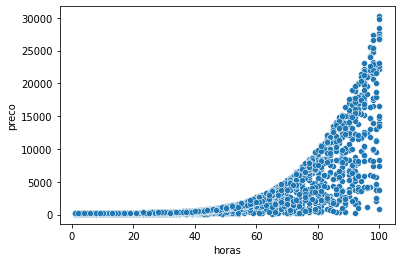

In [7]:
#!pip install seaborn==0.9.0

import seaborn as sns

sns.scatterplot(x="horas",y="preco",data=dados)

<Axes: xlabel='horas', ylabel='preco'>

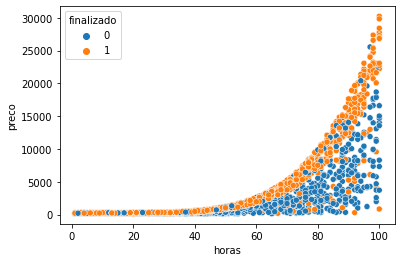

In [10]:
sns.scatterplot(x="horas",
                y="preco",
                hue="finalizado",
                data=dados)

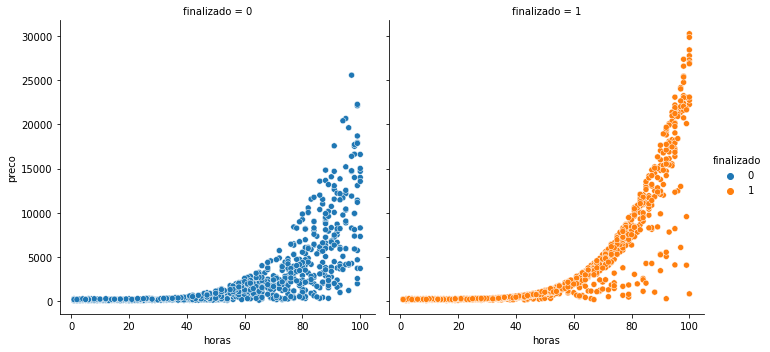

In [12]:
sns.relplot(x="horas",
                y="preco",
                hue="finalizado",
                col="finalizado",
                data=dados)

In [13]:
x = dados[["horas","preco"]]
y = dados["finalizado"]

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 54.26%


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [16]:
import numpy as np

prev_baseline = np.ones(540)

acuracia = accuracy_score(teste_y, prev_baseline) * 100
print("A acurácia do algoritmo de baseline foi %.2f%%" % acuracia)

A acurácia do algoritmo de baseline foi 52.59%


<Axes: xlabel='horas', ylabel='preco'>

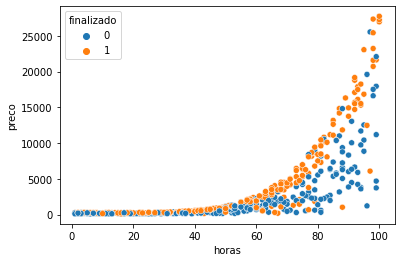

In [18]:
sns.scatterplot(x="horas", y="preco", hue=teste_y, data=teste_x) 


In [20]:
xmin = teste_x.horas.min()
xmax = teste_x.horas.max()
ymin = teste_x.preco.min()
ymax = teste_x.preco.max()
print(xmin,xmax,ymin,ymax)

1 100 101 27738


In [26]:
pixels = 100
eixo_x = np.arange(xmin, xmax, (xmax-xmin)/pixels)
eixo_y = np.arange(ymin, ymax, (ymax-ymin)/pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [28]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

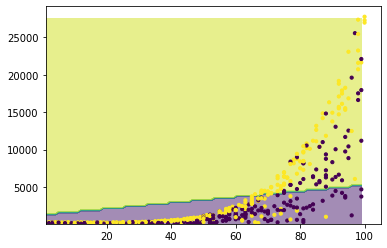

In [35]:
import matplotlib.pyplot as plt

plt.contourf(xx,yy,Z,alpha=0.5)
plt.scatter(teste_x.horas, teste_x.preco, c=teste_y, s=10)